In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pylab
import scipy.stats as stat
from scipy.stats import ttest_ind, chi2_contingency
import statsmodels.api as sm
from statsmodels.formula.api import ols
from category_encoders import TargetEncoder
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
import os

In [88]:
os.chdir("C:\\Users\\Nilesh\\Documents\\GitHub\\Credit Card Spam Detection")
df = pd.read_csv("Creditfraud.csv")
df.head(5)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


### Identifying the dimensions

In [89]:
df.shape

(555719, 23)

In [90]:
df.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

### Variable Identification

In [91]:
df.dtypes

Unnamed: 0                 int64
trans_date_trans_time     object
cc_num                     int64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
dtype: object

In [92]:
categorical = []
continuous = []
for column in df.columns:
    if df[column].dtypes == "int64" or df[column].dtypes == "float64":
        continuous.append(column)
    if df[column].dtypes == "object":
        categorical.append(column)

In [93]:
categorical

['trans_date_trans_time',
 'merchant',
 'category',
 'first',
 'last',
 'gender',
 'street',
 'city',
 'state',
 'job',
 'dob',
 'trans_num']

In [94]:
continuous

['Unnamed: 0',
 'cc_num',
 'amt',
 'zip',
 'lat',
 'long',
 'city_pop',
 'unix_time',
 'merch_lat',
 'merch_long',
 'is_fraud']

### Univarient Analysis for Contineous Variables

In [95]:
df.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,555719.000000,5.557190e+05,555719.000000,555719.000000,555719.000000,555719.000000,5.557190e+05,5.557190e+05,555719.000000,555719.000000,555719.000000
mean,277859.000000,4.178387e+17,69.392810,48842.628015,38.543253,-90.231325,8.822189e+04,1.380679e+09,38.542798,-90.231380,0.003860
std,160422.401459,1.309837e+18,156.745941,26855.283328,5.061336,13.721780,3.003909e+05,5.201104e+06,5.095829,13.733071,0.062008
min,0.000000,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.371817e+09,19.027422,-166.671575,0.000000
25%,138929.500000,1.800429e+14,9.630000,26292.000000,34.668900,-96.798000,7.410000e+02,1.376029e+09,34.755302,-96.905129,0.000000
50%,277859.000000,3.521417e+15,47.290000,48174.000000,39.371600,-87.476900,2.408000e+03,1.380762e+09,39.376593,-87.445204,0.000000
75%,416788.500000,4.635331e+15,83.010000,72011.000000,41.894800,-80.175200,1.968500e+04,1.385867e+09,41.954163,-80.264637,0.000000
max,555718.000000,4.992346e+18,22768.110000,99921.000000,65.689900,-67.950300,2.906700e+06,1.388534e+09,66.679297,-66.952026,1.000000


### Univarient Analysis for Categorical Variables

In [96]:
categorical

['trans_date_trans_time',
 'merchant',
 'category',
 'first',
 'last',
 'gender',
 'street',
 'city',
 'state',
 'job',
 'dob',
 'trans_num']

In [97]:
for column in categorical:
    print("--------------------------------")
    print(column)
    print("--------------------------------")
    print(df[column].value_counts()/len(df[column]))
    print("--------------------------------")
    print("\n")

--------------------------------
trans_date_trans_time
--------------------------------
2020-12-19 16:02:22    0.000007
2020-12-13 17:53:47    0.000007
2020-12-17 20:36:39    0.000007
2020-10-05 19:37:49    0.000007
2020-12-27 01:22:37    0.000005
                         ...   
2020-08-25 13:15:57    0.000002
2020-08-25 13:15:37    0.000002
2020-08-25 13:15:22    0.000002
2020-08-25 13:15:12    0.000002
2020-12-31 23:59:34    0.000002
Name: trans_date_trans_time, Length: 544760, dtype: float64
--------------------------------


--------------------------------
merchant
--------------------------------
fraud_Kilback LLC                        0.003345
fraud_Cormier LLC                        0.002874
fraud_Schumm PLC                         0.002809
fraud_Kuhn LLC                           0.002737
fraud_Dickinson Ltd                      0.002733
                                           ...   
fraud_Treutel-King                       0.000581
fraud_Satterfield-Lowe                  

### Bivarient Analyisis contineous - contineous variable

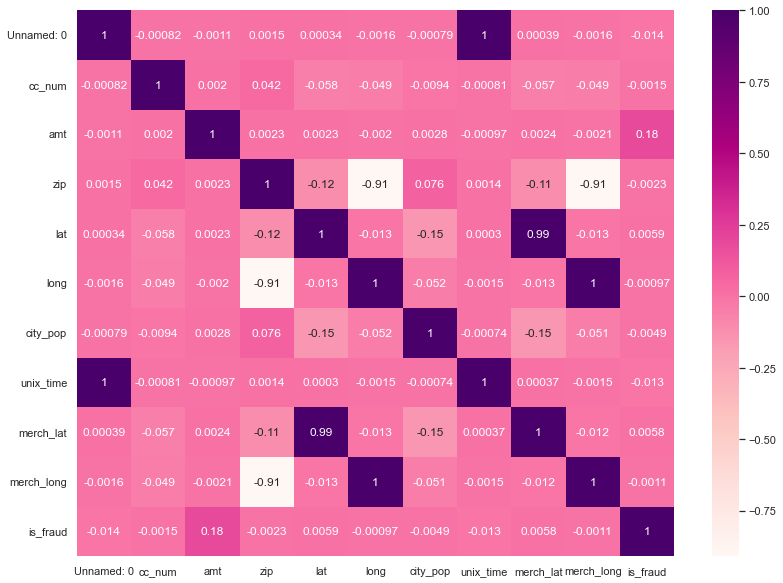

In [98]:
# plotting correlation heatmap
sns.set(rc={'figure.figsize':(11.7,8.27)})
dataplot = sns.heatmap(df.corr(), cmap='RdPu', annot=True)
  
# displaying heatmap
plt.show()

In [99]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df.drop(['cc_num'], axis=1, inplace=True)
df.drop(['zip'], axis=1, inplace=True)
df.drop(['lat'], axis=1, inplace=True)
df.drop(['long'], axis=1, inplace=True)
df.drop(['city_pop'], axis=1, inplace=True)
df.drop(['merch_lat'], axis=1, inplace=True)
df.drop(['merch_long'], axis=1, inplace=True)

In [100]:
df

,trans_date_trans_time,merchant,category,amt,first,last,gender,street,city,state,job,dob,trans_num,unix_time,is_fraud
0,2020-06-21 12:14:25,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,SC,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,0
1,2020-06-21 12:14:33,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,UT,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,0
2,2020-06-21 12:14:53,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,NY,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,0
3,2020-06-21 12:15:15,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,FL,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,0
4,2020-06-21 12:15:17,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,MI,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,2020-12-31 23:59:07,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,Luray,MO,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,0
555715,2020-12-31 23:59:09,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,Lake Jackson,TX,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,0
555716,2020-12-31 23:59:15,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,Burbank,WA,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,0
555717,2020-12-31 23:59:24,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,Mesa,ID,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,0


In [101]:
df.columns

Index(['trans_date_trans_time', 'merchant', 'category', 'amt', 'first', 'last',
       'gender', 'street', 'city', 'state', 'job', 'dob', 'trans_num',
       'unix_time', 'is_fraud'],
      dtype='object')

### Bivarient Analyisis categorical - categorical variable

In [102]:
df.dtypes

trans_date_trans_time     object
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
job                       object
dob                       object
trans_num                 object
unix_time                  int64
is_fraud                   int64
dtype: object

In [103]:
chi2_contingency(pd.crosstab(df['trans_date_trans_time'],df['is_fraud']))[1]

0.3411335532186254

In [104]:
chi2_contingency(pd.crosstab(df['merchant'],df['is_fraud']))[1]

1.8022270460261968e-205

In [105]:
chi2_contingency(pd.crosstab(df['gender'],df['is_fraud']))[1]

0.5922844718406959

In [106]:
chi2_contingency(pd.crosstab(df['street'],df['is_fraud']))[1]

0.0

In [107]:
df.drop(['street'], axis=1, inplace=True)

In [108]:
chi2_contingency(pd.crosstab(df['city'],df['is_fraud']))[1]

0.0

In [109]:
df.drop(['city'], axis=1, inplace=True)

In [110]:
chi2_contingency(pd.crosstab(df['job'],df['is_fraud']))[1]

0.0

In [111]:
df.drop(['job'], axis=1, inplace=True)

In [112]:
chi2_contingency(pd.crosstab(df['dob'],df['is_fraud']))[1]

0.0

In [113]:
df.drop(['dob'], axis=1, inplace=True)

In [114]:
chi2_contingency(pd.crosstab(df['trans_num'],df['is_fraud']))[1]

0.4993693095753912

In [115]:
df

,trans_date_trans_time,merchant,category,amt,first,last,gender,state,trans_num,unix_time,is_fraud
0,2020-06-21 12:14:25,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,SC,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,0
1,2020-06-21 12:14:33,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,UT,324cc204407e99f51b0d6ca0055005e7,1371816873,0
2,2020-06-21 12:14:53,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,NY,c81755dbbbea9d5c77f094348a7579be,1371816893,0
3,2020-06-21 12:15:15,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,FL,2159175b9efe66dc301f149d3d5abf8c,1371816915,0
4,2020-06-21 12:15:17,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,MI,57ff021bd3f328f8738bb535c302a31b,1371816917,0
...,...,...,...,...,...,...,...,...,...,...,...
555714,2020-12-31 23:59:07,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,MO,9b1f753c79894c9f4b71f04581835ada,1388534347,0
555715,2020-12-31 23:59:09,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,TX,2090647dac2c89a1d86c514c427f5b91,1388534349,0
555716,2020-12-31 23:59:15,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,WA,6c5b7c8add471975aa0fec023b2e8408,1388534355,0
555717,2020-12-31 23:59:24,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,ID,14392d723bb7737606b2700ac791b7aa,1388534364,0


### Missing Value treatement

In [116]:
df.describe()

,amt,unix_time,is_fraud
count,555719.000000,5.557190e+05,555719.000000
mean,69.392810,1.380679e+09,0.003860
std,156.745941,5.201104e+06,0.062008
min,1.000000,1.371817e+09,0.000000
25%,9.630000,1.376029e+09,0.000000
50%,47.290000,1.380762e+09,0.000000
75%,83.010000,1.385867e+09,0.000000
max,22768.110000,1.388534e+09,1.000000


In [117]:
df.isnull().sum()

trans_date_trans_time    0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
state                    0
trans_num                0
unix_time                0
is_fraud                 0
dtype: int64

In [118]:
df['merchant'].value_counts()

fraud_Kilback LLC                        1859
fraud_Cormier LLC                        1597
fraud_Schumm PLC                         1561
fraud_Kuhn LLC                           1521
fraud_Dickinson Ltd                      1519
                                         ... 
fraud_Treutel-King                        323
fraud_Satterfield-Lowe                    319
fraud_Kessler Group                       318
fraud_Jerde-Hermann                       312
fraud_Ritchie, Bradtke and Stiedemann     304
Name: merchant, Length: 693, dtype: int64

In [119]:
df['category'].value_counts()

gas_transport     56370
grocery_pos       52553
home              52345
shopping_pos      49791
kids_pets         48692
shopping_net      41779
entertainment     40104
personal_care     39327
food_dining       39268
health_fitness    36674
misc_pos          34574
misc_net          27367
grocery_net       19426
travel            17449
Name: category, dtype: int64

In [120]:
df['state'].value_counts()

TX    40393
NY    35918
PA    34326
CA    24135
OH    20147
MI    19671
IL    18960
FL    18104
AL    17532
MO    16501
MN    13719
AR    13484
NC    12868
SC    12541
KY    12506
VA    12506
WI    12370
IN    11959
IA    11819
OK    11379
GA    11277
MD    11152
WV    10838
NJ    10528
NE    10257
KS     9943
LA     8988
MS     8833
WY     8454
WA     8116
OR     7811
TN     7359
NM     7020
ME     6928
ND     6397
CO     5886
SD     5250
MA     5186
MT     5052
VT     5044
UT     4658
AZ     4592
NH     3449
CT     3277
ID     2490
NV     2451
DC     1517
HI     1090
AK      843
RI      195
Name: state, dtype: int64

In [121]:
df['first'].value_counts()

Christopher    11443
Robert          9076
Jessica         8655
David           8599
Michael         8530
               ...  
Mike             199
Dennis            12
Evan              12
Bruce             10
Nicole             9
Name: first, Length: 341, dtype: int64

In [122]:
df['last'].value_counts()

Smith        12146
Williams     10056
Davis         9524
Johnson       8556
Rodriguez     7485
             ...  
Santiago        12
Bates           12
Robbins         10
Freeman          8
Bartlett         7
Name: last, Length: 471, dtype: int64

### Exporting Feature Selected Data

In [123]:
df.to_csv('CSD_FS.csv', encoding='utf-8', index=False)

In [39]:
df

,trans_date_trans_time,merchant,category,amt,first,last,gender,state,trans_num,unix_time,is_fraud,fullname
0,2020-06-21 12:14:25,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,SC,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,0,Jeff Elliott
1,2020-06-21 12:14:33,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,UT,324cc204407e99f51b0d6ca0055005e7,1371816873,0,Joanne Williams
2,2020-06-21 12:14:53,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,NY,c81755dbbbea9d5c77f094348a7579be,1371816893,0,Ashley Lopez
3,2020-06-21 12:15:15,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,FL,2159175b9efe66dc301f149d3d5abf8c,1371816915,0,Brian Williams
4,2020-06-21 12:15:17,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,MI,57ff021bd3f328f8738bb535c302a31b,1371816917,0,Nathan Massey
...,...,...,...,...,...,...,...,...,...,...,...,...
555714,2020-12-31 23:59:07,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,MO,9b1f753c79894c9f4b71f04581835ada,1388534347,0,Michael Olson
555715,2020-12-31 23:59:09,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,TX,2090647dac2c89a1d86c514c427f5b91,1388534349,0,Jose Vasquez
555716,2020-12-31 23:59:15,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,WA,6c5b7c8add471975aa0fec023b2e8408,1388534355,0,Ann Lawson
555717,2020-12-31 23:59:24,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,ID,14392d723bb7737606b2700ac791b7aa,1388534364,0,Eric Preston


In [40]:
df["fullname"].value_counts()

Scott Martin         1965
Jeffrey Smith        1526
Gina Grimes          1474
Michelle Gregory     1466
Carrie Washington    1462
                     ... 
Rachel Williams         9
Nicole Dominguez        9
Stephanie Freeman       8
Joseph Bartlett         7
Destiny Fowler          6
Name: fullname, Length: 917, dtype: int64

In [42]:
df.head(5)

,trans_date_trans_time,merchant,category,amt,gender,state,trans_num,unix_time,is_fraud,fullname
0,2020-06-21 12:14:25,fraud_Kirlin and Sons,personal_care,2.86,M,SC,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,0,Jeff Elliott
1,2020-06-21 12:14:33,fraud_Sporer-Keebler,personal_care,29.84,F,UT,324cc204407e99f51b0d6ca0055005e7,1371816873,0,Joanne Williams
2,2020-06-21 12:14:53,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,F,NY,c81755dbbbea9d5c77f094348a7579be,1371816893,0,Ashley Lopez
3,2020-06-21 12:15:15,fraud_Haley Group,misc_pos,60.05,M,FL,2159175b9efe66dc301f149d3d5abf8c,1371816915,0,Brian Williams
4,2020-06-21 12:15:17,fraud_Johnston-Casper,travel,3.19,M,MI,57ff021bd3f328f8738bb535c302a31b,1371816917,0,Nathan Massey


In [43]:
import pickle
le = LabelEncoder()
df['gender_le'] = le.fit_transform(df['gender'])
pickle.dump(le, open('gender_le.pkl','wb'))

In [44]:
df.drop(['gender'], axis=1, inplace=True)

In [45]:
df

,trans_date_trans_time,merchant,category,amt,state,trans_num,unix_time,is_fraud,fullname,gender_le
0,2020-06-21 12:14:25,fraud_Kirlin and Sons,personal_care,2.86,SC,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,0,Jeff Elliott,1
1,2020-06-21 12:14:33,fraud_Sporer-Keebler,personal_care,29.84,UT,324cc204407e99f51b0d6ca0055005e7,1371816873,0,Joanne Williams,0
2,2020-06-21 12:14:53,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,NY,c81755dbbbea9d5c77f094348a7579be,1371816893,0,Ashley Lopez,0
3,2020-06-21 12:15:15,fraud_Haley Group,misc_pos,60.05,FL,2159175b9efe66dc301f149d3d5abf8c,1371816915,0,Brian Williams,1
4,2020-06-21 12:15:17,fraud_Johnston-Casper,travel,3.19,MI,57ff021bd3f328f8738bb535c302a31b,1371816917,0,Nathan Massey,1
...,...,...,...,...,...,...,...,...,...,...
555714,2020-12-31 23:59:07,fraud_Reilly and Sons,health_fitness,43.77,MO,9b1f753c79894c9f4b71f04581835ada,1388534347,0,Michael Olson,1
555715,2020-12-31 23:59:09,fraud_Hoppe-Parisian,kids_pets,111.84,TX,2090647dac2c89a1d86c514c427f5b91,1388534349,0,Jose Vasquez,1
555716,2020-12-31 23:59:15,fraud_Rau-Robel,kids_pets,86.88,WA,6c5b7c8add471975aa0fec023b2e8408,1388534355,0,Ann Lawson,0
555717,2020-12-31 23:59:24,fraud_Breitenberg LLC,travel,7.99,ID,14392d723bb7737606b2700ac791b7aa,1388534364,0,Eric Preston,1


In [46]:
le = LabelEncoder()
df['merchant_le'] = le.fit_transform(df['merchant'])
df.drop(['merchant'], axis=1, inplace=True)
pickle.dump(le, open('merchant_le.pkl','wb'))

In [47]:
df

,trans_date_trans_time,category,amt,state,trans_num,unix_time,is_fraud,fullname,gender_le,merchant_le
0,2020-06-21 12:14:25,personal_care,2.86,SC,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,0,Jeff Elliott,1,319
1,2020-06-21 12:14:33,personal_care,29.84,UT,324cc204407e99f51b0d6ca0055005e7,1371816873,0,Joanne Williams,0,591
2,2020-06-21 12:14:53,health_fitness,41.28,NY,c81755dbbbea9d5c77f094348a7579be,1371816893,0,Ashley Lopez,0,611
3,2020-06-21 12:15:15,misc_pos,60.05,FL,2159175b9efe66dc301f149d3d5abf8c,1371816915,0,Brian Williams,1,222
4,2020-06-21 12:15:17,travel,3.19,MI,57ff021bd3f328f8738bb535c302a31b,1371816917,0,Nathan Massey,1,292
...,...,...,...,...,...,...,...,...,...,...
555714,2020-12-31 23:59:07,health_fitness,43.77,MO,9b1f753c79894c9f4b71f04581835ada,1388534347,0,Michael Olson,1,507
555715,2020-12-31 23:59:09,kids_pets,111.84,TX,2090647dac2c89a1d86c514c427f5b91,1388534349,0,Jose Vasquez,1,264
555716,2020-12-31 23:59:15,kids_pets,86.88,WA,6c5b7c8add471975aa0fec023b2e8408,1388534355,0,Ann Lawson,0,496
555717,2020-12-31 23:59:24,travel,7.99,ID,14392d723bb7737606b2700ac791b7aa,1388534364,0,Eric Preston,1,75


In [48]:
le = LabelEncoder()
df['state_le'] = le.fit_transform(df['state'])
df.drop(['state'], axis=1, inplace=True)
pickle.dump(le, open('state_le.pkl','wb'))

In [49]:
df

,trans_date_trans_time,category,amt,trans_num,unix_time,is_fraud,fullname,gender_le,merchant_le,state_le
0,2020-06-21 12:14:25,personal_care,2.86,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,0,Jeff Elliott,1,319,39
1,2020-06-21 12:14:33,personal_care,29.84,324cc204407e99f51b0d6ca0055005e7,1371816873,0,Joanne Williams,0,591,43
2,2020-06-21 12:14:53,health_fitness,41.28,c81755dbbbea9d5c77f094348a7579be,1371816893,0,Ashley Lopez,0,611,33
3,2020-06-21 12:15:15,misc_pos,60.05,2159175b9efe66dc301f149d3d5abf8c,1371816915,0,Brian Williams,1,222,8
4,2020-06-21 12:15:17,travel,3.19,57ff021bd3f328f8738bb535c302a31b,1371816917,0,Nathan Massey,1,292,21
...,...,...,...,...,...,...,...,...,...,...
555714,2020-12-31 23:59:07,health_fitness,43.77,9b1f753c79894c9f4b71f04581835ada,1388534347,0,Michael Olson,1,507,23
555715,2020-12-31 23:59:09,kids_pets,111.84,2090647dac2c89a1d86c514c427f5b91,1388534349,0,Jose Vasquez,1,264,42
555716,2020-12-31 23:59:15,kids_pets,86.88,6c5b7c8add471975aa0fec023b2e8408,1388534355,0,Ann Lawson,0,496,46
555717,2020-12-31 23:59:24,travel,7.99,14392d723bb7737606b2700ac791b7aa,1388534364,0,Eric Preston,1,75,12


In [50]:
df['trans_num'].value_counts()

2da90c7d74bd46a0caf3777415b3ebd3    1
7b0f0f113f949d3f9f9e3951f720e507    1
19e0a51f95ac46f1c0076b94badde4e2    1
ffb01d7da76c227c9b41f090ce1fe558    1
176f641c4139e069710ae11c997189a2    1
                                   ..
b861f33f7adf1d7b849e0a4e527b76d4    1
739a283be52dfe3caac0dafbc87df525    1
25c80571f38ca752233ab232d592fdc4    1
a953633e35ee9d575cf3c77dd41bf9eb    1
1765bb45b3aa3224b4cdcb6e7a96cee3    1
Name: trans_num, Length: 555719, dtype: int64

In [51]:
df.drop(['trans_num'], axis=1, inplace=True)

In [52]:
le = LabelEncoder()
df['category_le'] = le.fit_transform(df['category'])
df.drop(['category'], axis=1, inplace=True)
pickle.dump(le, open('category_le.pkl','wb'))

In [53]:
df

,trans_date_trans_time,amt,unix_time,is_fraud,fullname,gender_le,merchant_le,state_le,category_le
0,2020-06-21 12:14:25,2.86,1371816865,0,Jeff Elliott,1,319,39,10
1,2020-06-21 12:14:33,29.84,1371816873,0,Joanne Williams,0,591,43,10
2,2020-06-21 12:14:53,41.28,1371816893,0,Ashley Lopez,0,611,33,5
3,2020-06-21 12:15:15,60.05,1371816915,0,Brian Williams,1,222,8,9
4,2020-06-21 12:15:17,3.19,1371816917,0,Nathan Massey,1,292,21,13
...,...,...,...,...,...,...,...,...,...
555714,2020-12-31 23:59:07,43.77,1388534347,0,Michael Olson,1,507,23,5
555715,2020-12-31 23:59:09,111.84,1388534349,0,Jose Vasquez,1,264,42,7
555716,2020-12-31 23:59:15,86.88,1388534355,0,Ann Lawson,0,496,46,7
555717,2020-12-31 23:59:24,7.99,1388534364,0,Eric Preston,1,75,12,13


In [54]:
le = LabelEncoder()
df['fullname_le'] = le.fit_transform(df['fullname'])
df.drop(['fullname'], axis=1, inplace=True)
pickle.dump(le, open('fullname_le.pkl','wb'))

In [55]:
df

,trans_date_trans_time,amt,unix_time,is_fraud,gender_le,merchant_le,state_le,category_le,fullname_le
0,2020-06-21 12:14:25,2.86,1371816865,0,1,319,39,10,377
1,2020-06-21 12:14:33,29.84,1371816873,0,0,591,43,10,428
2,2020-06-21 12:14:53,41.28,1371816893,0,0,611,33,5,70
3,2020-06-21 12:15:15,60.05,1371816915,0,1,222,8,9,109
4,2020-06-21 12:15:17,3.19,1371816917,0,1,292,21,13,678
...,...,...,...,...,...,...,...,...,...
555714,2020-12-31 23:59:07,43.77,1388534347,0,1,507,23,5,644
555715,2020-12-31 23:59:09,111.84,1388534349,0,1,264,42,7,452
555716,2020-12-31 23:59:15,86.88,1388534355,0,0,496,46,7,59
555717,2020-12-31 23:59:24,7.99,1388534364,0,1,75,12,13,285


In [56]:
df.drop(['trans_date_trans_time'], axis=1, inplace=True)

In [57]:
df

,amt,unix_time,is_fraud,gender_le,merchant_le,state_le,category_le,fullname_le
0,2.86,1371816865,0,1,319,39,10,377
1,29.84,1371816873,0,0,591,43,10,428
2,41.28,1371816893,0,0,611,33,5,70
3,60.05,1371816915,0,1,222,8,9,109
4,3.19,1371816917,0,1,292,21,13,678
...,...,...,...,...,...,...,...,...
555714,43.77,1388534347,0,1,507,23,5,644
555715,111.84,1388534349,0,1,264,42,7,452
555716,86.88,1388534355,0,0,496,46,7,59
555717,7.99,1388534364,0,1,75,12,13,285


In [58]:
df_Y = df['is_fraud']
df_Y

0         0
1         0
2         0
3         0
4         0
         ..
555714    0
555715    0
555716    0
555717    0
555718    0
Name: is_fraud, Length: 555719, dtype: int64

In [59]:
df_X = df.iloc[:,[0,1,3,4,5,6,7]]
df_X

,amt,unix_time,gender_le,merchant_le,state_le,category_le,fullname_le
0,2.86,1371816865,1,319,39,10,377
1,29.84,1371816873,0,591,43,10,428
2,41.28,1371816893,0,611,33,5,70
3,60.05,1371816915,1,222,8,9,109
4,3.19,1371816917,1,292,21,13,678
...,...,...,...,...,...,...,...
555714,43.77,1388534347,1,507,23,5,644
555715,111.84,1388534349,1,264,42,7,452
555716,86.88,1388534355,0,496,46,7,59
555717,7.99,1388534364,1,75,12,13,285


In [60]:
scaler = StandardScaler()
df_X_scaled = pd.DataFrame(scaler.fit_transform(df_X),columns=df_X.columns)

In [61]:
pickle.dump(scaler, open('slr.pkl','wb'))

In [62]:
df_X_scaled

,amt,unix_time,gender_le,merchant_le,state_le,category_le,fullname_le
0,-0.424463,-1.703871,1.102494,-0.119663,0.937072,0.961683,-0.327833
1,-0.252337,-1.703869,-0.907034,1.231656,1.220424,0.961683,-0.133723
2,-0.179353,-1.703865,-0.907034,1.331017,0.512044,-0.316151,-1.496303
3,-0.059605,-1.703861,1.102494,-0.601568,-1.258908,0.706116,-1.347865
4,-0.422358,-1.703861,1.102494,-0.253802,-0.338013,1.728384,0.817800
...,...,...,...,...,...,...,...
555714,-0.163467,1.510350,1.102494,0.814337,-0.196337,-0.316151,0.688393
555715,0.270803,1.510351,1.102494,-0.392908,1.149586,0.194983,-0.042376
555716,0.111564,1.510352,-0.907034,0.759688,1.432939,0.194983,-1.538170
555717,-0.391735,1.510354,1.102494,-1.331876,-0.975555,1.728384,-0.677993


In [63]:
df_scaled = pd.concat([df_X_scaled, df_Y], axis=1)

In [64]:
df_scaled

,amt,unix_time,gender_le,merchant_le,state_le,category_le,fullname_le,is_fraud
0,-0.424463,-1.703871,1.102494,-0.119663,0.937072,0.961683,-0.327833,0
1,-0.252337,-1.703869,-0.907034,1.231656,1.220424,0.961683,-0.133723,0
2,-0.179353,-1.703865,-0.907034,1.331017,0.512044,-0.316151,-1.496303,0
3,-0.059605,-1.703861,1.102494,-0.601568,-1.258908,0.706116,-1.347865,0
4,-0.422358,-1.703861,1.102494,-0.253802,-0.338013,1.728384,0.817800,0
...,...,...,...,...,...,...,...,...
555714,-0.163467,1.510350,1.102494,0.814337,-0.196337,-0.316151,0.688393,0
555715,0.270803,1.510351,1.102494,-0.392908,1.149586,0.194983,-0.042376,0
555716,0.111564,1.510352,-0.907034,0.759688,1.432939,0.194983,-1.538170,0
555717,-0.391735,1.510354,1.102494,-1.331876,-0.975555,1.728384,-0.677993,0


In [65]:
X = df_scaled.iloc[:,:-1].values
X

array([[-0.42446311, -1.70387057,  1.10249443, ...,  0.93707226,
         0.9616832 , -0.32783314],
       [-0.25233729, -1.70386903, -0.90703406, ...,  1.2204245 ,
         0.9616832 , -0.13372256],
       [-0.17935288, -1.70386518, -0.90703406, ...,  0.5120439 ,
        -0.31615123, -1.49630268],
       ...,
       [ 0.11156401,  1.5103518 , -0.90703406, ...,  1.43293868,
         0.19498254, -1.53816966],
       [-0.39173496,  1.51035353,  1.10249443, ..., -0.97555537,
         1.72838387, -0.67799339],
       [-0.19944911,  1.51035546,  1.10249443, ...,  0.65372002,
        -1.59398566,  1.16034793]])

In [66]:
Y = df_scaled.iloc[:,-1].values
Y

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [67]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.66, shuffle=True)

In [68]:
from sklearn import metrics
from sklearn.metrics import classification_report

In [69]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=16)
lr.fit(X_train, Y_train)
Y_pred = lr.predict(X_test)
confusion_matrix = metrics.confusion_matrix(Y_test, Y_pred)
print("-"*70)
print("Report")
print("-"*70)
print("Confusion Matrix:")
print(str(confusion_matrix))
target_names = ['without diabetes', 'with diabetes']
acc=(confusion_matrix[0][0] + confusion_matrix[1][1])/(confusion_matrix[0][0]+confusion_matrix[0][1]+confusion_matrix[1][0]+confusion_matrix[1][1])
print("Accuracy by confusion matrix: "+str(acc))
print("\n")
print(classification_report(Y_test, Y_pred, target_names=target_names))
print("-"*70)
pickle.dump(lr, open('lr.pkl','wb'))

----------------------------------------------------------------------
Report
----------------------------------------------------------------------
Confusion Matrix:
[[188131     57]
 [   757      0]]
Accuracy by confusion matrix: 0.9956918680039165


                  precision    recall  f1-score   support

without diabetes       1.00      1.00      1.00    188188
   with diabetes       0.00      0.00      0.00       757

        accuracy                           1.00    188945
       macro avg       0.50      0.50      0.50    188945
    weighted avg       0.99      1.00      0.99    188945

----------------------------------------------------------------------


In [70]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, Y_train)
Y_pred = gnb.predict(X_test)
confusion_matrix = metrics.confusion_matrix(Y_test, Y_pred)
print("-"*70)
print("Report")
print("-"*70)
print("Confusion Matrix:")
print(str(confusion_matrix))
target_names = ['without diabetes', 'with diabetes']
acc=(confusion_matrix[0][0] + confusion_matrix[1][1])/(confusion_matrix[0][0]+confusion_matrix[0][1]+confusion_matrix[1][0]+confusion_matrix[1][1])
print("Accuracy by confusion matrix: "+str(acc))
print("\n")
print(classification_report(Y_test, Y_pred, target_names=target_names))
print("-"*70)
pickle.dump(gnb, open('gnb.pkl','wb'))

----------------------------------------------------------------------
Report
----------------------------------------------------------------------
Confusion Matrix:
[[187108   1080]
 [   414    343]]
Accuracy by confusion matrix: 0.9920929370980973


                  precision    recall  f1-score   support

without diabetes       1.00      0.99      1.00    188188
   with diabetes       0.24      0.45      0.31       757

        accuracy                           0.99    188945
       macro avg       0.62      0.72      0.66    188945
    weighted avg       0.99      0.99      0.99    188945

----------------------------------------------------------------------


In [71]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,Y_train)
Y_pred = knn.predict(X_test)
confusion_matrix = metrics.confusion_matrix(Y_test, Y_pred)
print("-"*70)
print("Report")
print("-"*70)
print("Confusion Matrix:")
print(str(confusion_matrix))
target_names = ['without diabetes', 'with diabetes']
acc=(confusion_matrix[0][0] + confusion_matrix[1][1])/(confusion_matrix[0][0]+confusion_matrix[0][1]+confusion_matrix[1][0]+confusion_matrix[1][1])
print("Accuracy by confusion matrix: "+str(acc))
print("\n")
print(classification_report(Y_test, Y_pred, target_names=target_names))
print("-"*70)
pickle.dump(knn, open('knn.pkl','wb'))

----------------------------------------------------------------------
Report
----------------------------------------------------------------------
Confusion Matrix:
[[187995    193]
 [   469    288]]
Accuracy by confusion matrix: 0.9964963349122761


                  precision    recall  f1-score   support

without diabetes       1.00      1.00      1.00    188188
   with diabetes       0.60      0.38      0.47       757

        accuracy                           1.00    188945
       macro avg       0.80      0.69      0.73    188945
    weighted avg       1.00      1.00      1.00    188945

----------------------------------------------------------------------


In [72]:
os.chdir("C:\\Users\\Nilesh\\Documents\\GitHub\\Credit Card Spam Detection")
df_copy = pd.read_csv("Creditfraud.csv")

In [73]:
df_copy

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,555714,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,...,40.4931,-91.8912,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0
555715,555715,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,...,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
555716,555716,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,...,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0
555717,555717,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,...,44.6255,-116.4493,129,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0


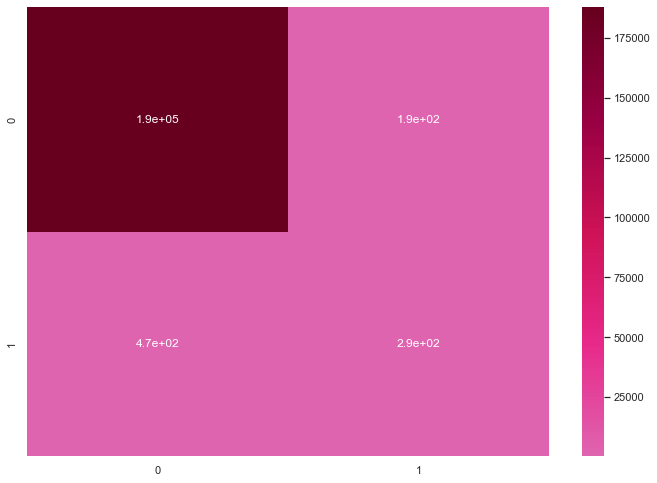

In [74]:
dataplot = sns.heatmap(confusion_matrix, cmap='PuRd', annot=True, center=0)

In [77]:
Y_pred = lr.predict(X)

In [78]:
Y_pred = pd.DataFrame(Y_pred, columns = ['Y_pred'])
df_results = pd.concat([df_copy, Y_pred], axis=1)
df_results

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,Y_pred
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,555714,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,...,-91.8912,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0,0
555715,555715,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,...,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0,0
555716,555716,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,...,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0,0
555717,555717,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,...,-116.4493,129,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0,0


<AxesSubplot:title={'center':'Predicted'}, xlabel='amt', ylabel='unix_time'>

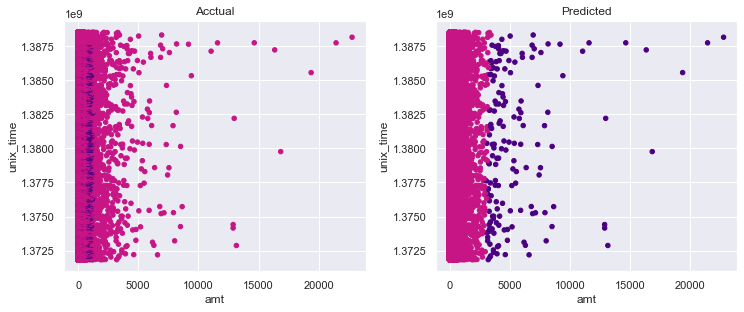

In [85]:
plt.rcParams["figure.figsize"] = [10.50, 4.50]
plt.rcParams["figure.autolayout"] = True
figure, axis = plt.subplots(1, 2)

colors = {0:'MEDIUMVIOLETRED', 1:'INDIGO'}
 
df_results.plot.scatter("amt","unix_time",title="Acctual",ax=axis[0],c=df_results['is_fraud'].map(colors))
df_results.plot.scatter("amt","unix_time",title="Predicted",ax=axis[1],c=df_results['Y_pred'].map(colors))